In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [307]:
anime_df=pd.read_csv("anime.csv")
rating_df=pd.read_csv("rating_c.csv")

In [308]:
rating_df['anime_id']
anime_df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      222
members       0
dtype: int64

In [309]:
anime_df.T

,0,1,2,3,4,5,6,7,8,9,...,11139,11140,11141,11142,11143,11144,11145,11146,11147,11148
anime_id,1,2,3,4,5,6,7,8,9,10,...,11142,11143,11144,11145,11146,11147,11148,11149,11150,11151
name,Growlanser IV: Wayfarer of the Time,Bus Gamer,Suna no Bara: Yuki no Mokushiroku,Tairiki Tarou no Mucha Shuugyou,Shinzou Ningen Casshern,Fuuma no Kojirou: Yasha-hen,Fuuma no Kojirou: Seiken Sensou-hen,Fuuma no Kojirou: Fuuma Hanran-hen,Flag Director&#039;s Edition: Issenman no Kufu...,Band of Ninja,...,Nil Admirari no Tenbin: Teito Genwaku Kitan,Kamigami no Ki,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,Flying Babies,Finis,One Room,Room Mate: One Room Side M,Tsukipro The Animation,Ganko-chan,Kenka Banchou Otome: Girl Beats Boys
genre,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,OVA,TV,OVA,Movie,TV,OVA,OVA,OVA,Movie,Movie,...,TV,TV,Movie,NaN,TV,TV,TV,TV,NaN,TV
episodes,1,3,1,1,35,6,6,1,1,1,...,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
rating,5.85,6.66,6.31,4.8,7.07,6.92,6.91,6.93,7.01,5.82,...,NaN,4.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
members,931,20550,633,852,2822,819,690,549,987,748,...,233,76,51,22,208,1616,219,843,11,319


In [310]:
print("shape:",anime_df.shape)
anime_df.dtypes
rating_df.shape

shape: (11149, 7)


(4335307, 3)

In [311]:
anime_df = anime_df.dropna(subset=['genre'])

def filling_the_missing_values(row):
    if pd.isna(row['type']):
        row['type'] = 'Unknown'
    if pd.isna(row['rating']):
        row['rating'] = anime_df['rating'].mean()
    return row

anime_df = anime_df.apply(filling_the_missing_values, axis=1)

anime_df.isna().sum()


anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [312]:
anime_df.duplicated().sum()

0

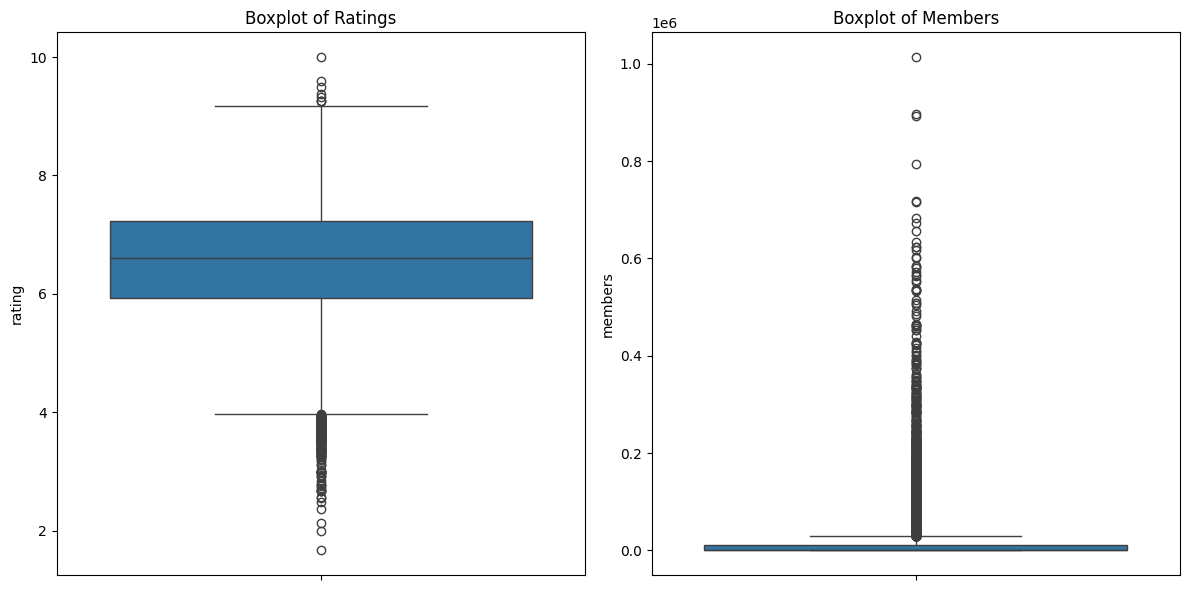

,rating,members
count,11087.000000,1.108700e+04
mean,6.509131,1.974166e+04
std,1.036648,5.743861e+04
min,1.670000,5.000000e+00
25%,5.930000,1.940000e+02
50%,6.600000,1.478000e+03
75%,7.230000,1.176300e+04
max,10.000000,1.013917e+06


In [313]:
stat_summary = anime_df[['rating', 'members']].describe()


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=anime_df['rating'])
plt.title('Boxplot of Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(y=anime_df['members'])
plt.title('Boxplot of Members')

plt.tight_layout()
plt.show()

stat_summary


In [314]:
#REMOVING OUTLIERS AND DATA REDUCTION
Q1 = anime_df['members'].quantile(0.25)
Q3 = anime_df['members'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anime_df_no_outliers = anime_df[(anime_df['members'] >= lower_bound) & (anime_df['members'] <= upper_bound)].copy()


anime_df_no_outliers['genre_number'] = anime_df_no_outliers['genre'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)


rating_min = anime_df_no_outliers['rating'].min()
rating_max = anime_df_no_outliers['rating'].max()
rating_third = (rating_max - rating_min) / 3
def categorize_rating(rating):
    if rating < rating_min + rating_third:
        return 'Low'
    elif rating < rating_min + 2 * rating_third:
        return 'Medium'
    else:
        return 'High'
anime_df_no_outliers['episodes'] = pd.to_numeric(anime_df_no_outliers['episodes'], errors='coerce')
anime_df_no_outliers['episodes'] = anime_df_no_outliers['episodes'].fillna(anime_df_no_outliers['episodes'].mean())//1
anime_df_no_outliers['rating_category'] = anime_df_no_outliers['rating'].apply(categorize_rating)
anime_df_no_outliers.tail(50)

,anime_id,name,genre,type,episodes,rating,members,genre_number,rating_category
11036,11039,Bakusou Circuit Roman Twin,Sports,OVA,1.0,6.000000,135,1,Medium
11037,11040,Ashita no Eleventachi,Sports,Special,1.0,6.050000,154,1,Medium
11038,11041,Shin Kyojin no Hoshi,Sports,TV,52.0,6.770000,165,1,Medium
11039,11042,Ginga e Kickoff!!: Natsuyasumi Special,Sports,Special,1.0,6.190000,762,1,Medium
11040,11043,Shin Kyojin no Hoshi II,Sports,TV,23.0,6.910000,145,1,Medium
11041,11044,Heong-geuli Beseuteu 5,Sports,Movie,1.0,4.500000,81,1,Medium
11042,11045,Dokgotak: Taeyang-eul Hyanghae Deonjyeola,Sports,Movie,1.0,5.500000,72,1,Medium
11043,11046,Dallyeola Hani,Sports,TV,13.0,6.640000,209,1,Medium
11044,11047,Nae Ireumeun Dokgotak,Sports,Movie,1.0,5.000000,66,1,Medium
11045,11048,Animal 1,Sports,TV,27.0,6.710000,122,1,Medium


In [315]:
# sum of each genres
genre_count = {}
for genres in anime_df_no_outliers['genre']:
    if isinstance(genres, str):
        for genre in genres.split(', '):
            if genre in genre_count:
                genre_count[genre] += 1
            else:
                genre_count[genre] = 1
genre_count

{'Action': 2132,
 'Adventure': 2002,
 'Cars': 67,
 'Comedy': 3759,
 'Sci-Fi': 1710,
 'Shounen': 1317,
 'Mecha': 822,
 'Sports': 470,
 'Demons': 170,
 'Drama': 1548,
 'Ecchi': 445,
 'Horror': 254,
 'Mystery': 313,
 'Romance': 927,
 'Fantasy': 1798,
 'Magic': 598,
 'Super Power': 309,
 'Supernatural': 579,
 'Vampire': 59,
 'Harem': 137,
 'School': 763,
 'Historical': 693,
 'Kids': 1581,
 'Shoujo': 485,
 'Martial Arts': 201,
 'Psychological': 118,
 'Josei': 32,
 'Military': 332,
 'Music': 813,
 'Space': 333,
 'Seinen': 364,
 'Game': 142,
 'Parody': 331,
 'Police': 170,
 'Samurai': 116,
 'Slice of Life': 975,
 'Dementia': 229,
 'Thriller': 34,
 'Shoujo Ai': 32,
 'Yuri': 10,
 'Shounen Ai': 49,
 'Yaoi': 26}

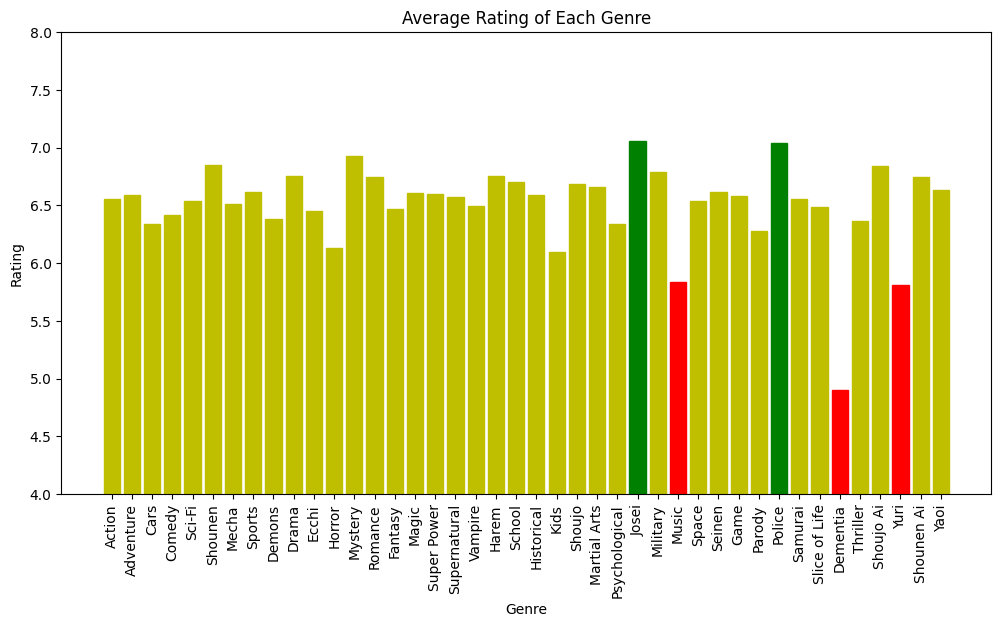

In [316]:
# rating of each genres
genre_rating = {}
for index, row in anime_df_no_outliers.iterrows():
    if isinstance(row['genre'], str):
        for genre in row['genre'].split(', '):
            if genre in genre_rating:
                genre_rating[genre].append(row['rating'])
            else:
                genre_rating[genre] = [row['rating']]
for genre in genre_rating:
    genre_rating[genre] = np.mean(genre_rating[genre])
genre_rating

# plot the rating of each genres
plt.figure(figsize=(12, 6))
plt.bar(genre_rating.keys(), genre_rating.values())
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Average Rating of Each Genre')
plt.ylim(4, 8)
# set each bar's color
for i, v in enumerate(genre_rating.values()):
    if v < 6:
        plt.gca().get_children()[i].set_color('r')
    elif v < 7:
        plt.gca().get_children()[i].set_color('y')
    else:
        plt.gca().get_children()[i].set_color('g')
plt.show()

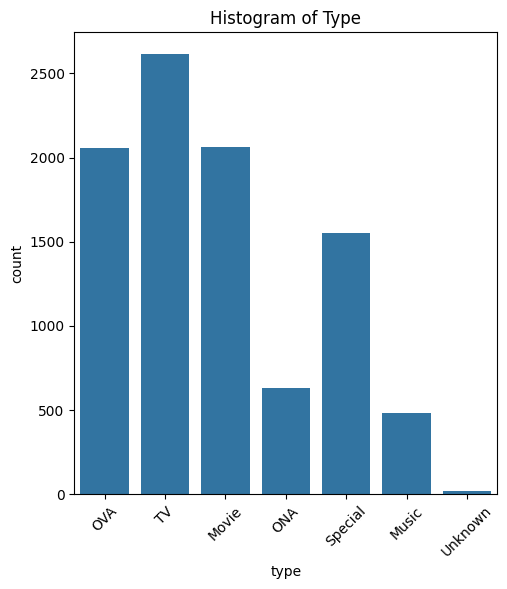

In [317]:
# histogram of type and rating
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='type', data=anime_df_no_outliers)
plt.title('Histogram of Type')
plt.xticks(rotation=45)
plt.show()

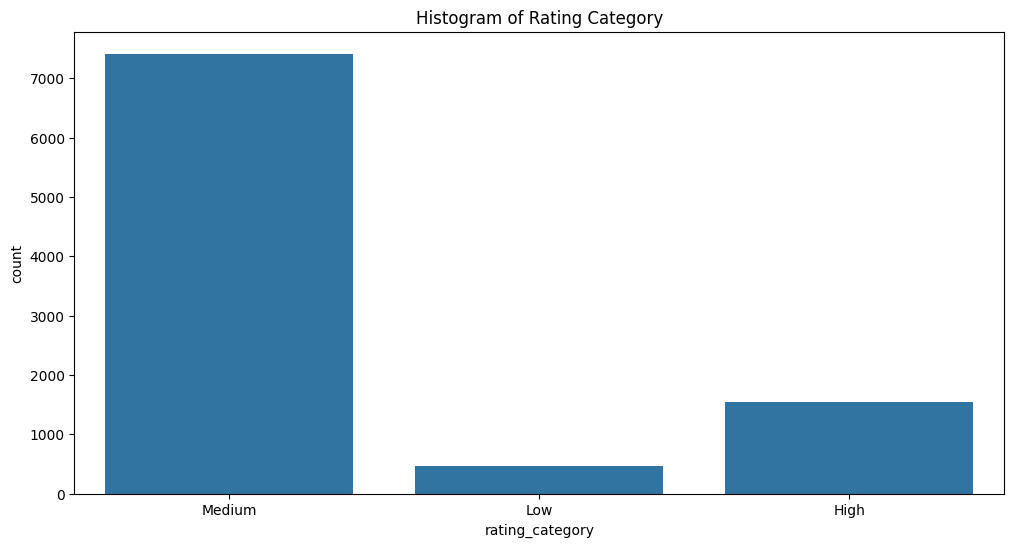

In [318]:
# histogram graph of rating_category, make much more good look
plt.figure(figsize=(12, 6))
sns.countplot(x='rating_category', data=anime_df_no_outliers)
plt.title('Histogram of Rating Category')
plt.show()

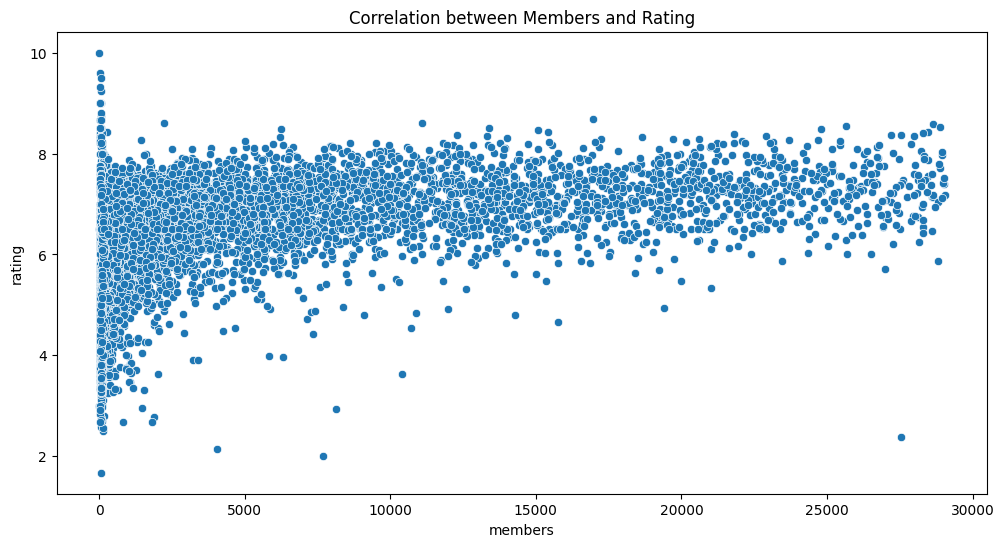

In [319]:
# correlation between members and rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='members', y='rating', data=anime_df_no_outliers)
plt.title('Correlation between Members and Rating')
plt.show()

In [320]:
# histogram of which genre rated high
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [321]:
anime_df_no_outliers.shape

(9421, 9)

In [322]:
anime_df_no_outliers.dtypes

anime_id             int64
name                object
genre               object
type                object
episodes           float64
rating             float64
members              int64
genre_number         int64
rating_category     object
dtype: object

In [323]:
rating_df.T

,0,1,2,3,4,5,6,7,8,9,...,4335297,4335298,4335299,4335300,4335301,4335302,4335303,4335304,4335305,4335306
user_id,1,1,1,1,1,1,1,1,1,1,...,73515,73515,73515,73515,73515,73515,73515,73515,73516,73516
anime_id,20,24,79,226,241,355,356,487,846,936,...,9919,10020,10087,10156,10218,10490,10588,11021,790,8074
rating,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,7,8,9,7,10,6,9,8,9,9


In [324]:
rating_df = rating_df[rating_df['rating'] != -1]
anime_df_no_outliers.rename(columns={"rating": "anime_rating"}, inplace=True)
rating_df.rename(columns={"rating": "user_rating"}, inplace=True)
anime_df_no_outliers.shape

(9421, 9)

In [325]:
rating_df

,user_id,anime_id,user_rating
37,1,8074,10
69,3,20,8
70,3,154,6
71,3,170,9
72,3,199,10
...,...,...,...
4335302,73515,10490,6
4335303,73515,10588,9
4335304,73515,11021,8
4335305,73516,790,9


In [326]:
final_df = pd.merge(anime_df_no_outliers,rating_df,on='anime_id')

In [327]:
rating_df

,user_id,anime_id,user_rating
37,1,8074,10
69,3,20,8
70,3,154,6
71,3,170,9
72,3,199,10
...,...,...,...
4335302,73515,10490,6
4335303,73515,10588,9
4335304,73515,11021,8
4335305,73516,790,9


In [328]:
final_df

,anime_id,name,genre,type,episodes,anime_rating,members,genre_number,rating_category,user_id,user_rating
0,1,Growlanser IV: Wayfarer of the Time,Action,OVA,1.0,5.85,931,1,Medium,19,10
1,1,Growlanser IV: Wayfarer of the Time,Action,OVA,1.0,5.85,931,1,Medium,21,9
2,1,Growlanser IV: Wayfarer of the Time,Action,OVA,1.0,5.85,931,1,Medium,23,9
3,1,Growlanser IV: Wayfarer of the Time,Action,OVA,1.0,5.85,931,1,Medium,32,10
4,1,Growlanser IV: Wayfarer of the Time,Action,OVA,1.0,5.85,931,1,Medium,34,7
...,...,...,...,...,...,...,...,...,...,...,...
3514679,11083,Kacchikenee!,Supernatural,Movie,1.0,6.28,855,1,Medium,71498,7
3514680,11083,Kacchikenee!,Supernatural,Movie,1.0,6.28,855,1,Medium,73356,6
3514681,11083,Kacchikenee!,Supernatural,Movie,1.0,6.28,855,1,Medium,73503,5
3514682,11087,Pico: My Little Summer Story,Yaoi,OVA,1.0,5.21,5551,1,Medium,12431,2


In [329]:
anime_df_no_outliers['name'].value_counts().sort_values(ascending=False)

name
Growlanser IV: Wayfarer of the Time                           1
Ninja Slayer From Animation                                   1
Doubutsu Mura no Sports Day                                   1
Flag Director&#039;s Edition: Issenman no Kufura no Kiroku    1
Suna no Bara: Yuki no Mokushiroku                             1
                                                             ..
Kacchikenee!                                                  1
Okitegami Kyouko no Bibouroku x Monogatari                    1
Kyoto Animation: Megane-hen                                   1
Yami no Teio: Kyuuketsuki Dracula                             1
Hitorijime My Hero                                            1
Name: count, Length: 9421, dtype: int64